# Neural Network Classification

- Binary Classification
> Target can be one of two options, e.g. yes or no
- Multi class Classification
> Target can be one of more than two options
- Multi label Classification
> Target can be assigned more than one option

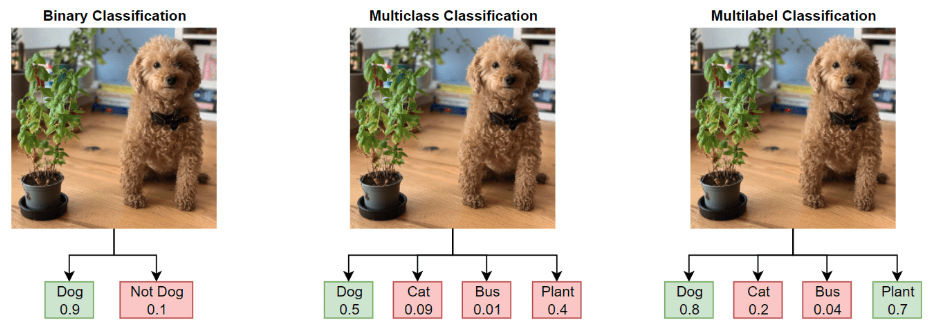

## Loss function
- regression tasks
  - [nn.MSELoss(Mean Square Error)](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html)
  - [nn.L1Loss(Mean Absolute Error)](https://pytorch.org/docs/stable/generated/torch.nn.L1Loss.html)

- binary classification tasks
  - [nn.BCELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html)
  - [nn.BCEWithLogitsLoss](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html):   
  combines `nn.Sigmoid` and `nn.BCELoss`

- multi classification tasks
  - [nn.CrossEntropyLoss](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html):   
  combines `nn.LogSoftmax` and `nn.NLLLoss`

# Binary Classification

## 1.Binary classification data ready
> Data can be almost anything but to get started we're going to create a simple binary classification dataset.

We'll use the `make_circles()` method from Scikit-Learn to generate two circles with different coloured dots.

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03, # a little bit of noise to the dots
                    random_state=42) # keep random state so we get the same values

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


In [ ]:
# Make DataFrame of circle data
import pandas as pd

circles = pd.DataFrame({"X1": X[:, 0],
    "X2": X[:, 1],
    "label": y
})
circles.head()

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [ ]:
# Check different labels
circles.label.value_counts()

,count
label,
1,500
0,500


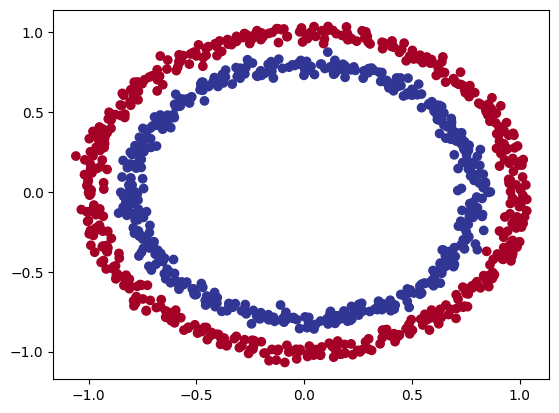

In [ ]:
# Visualize with a plot
import matplotlib.pyplot as plt

plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu);

### Input and output shapes

One of the most common errors in deep learning is shape errors.
Mismatching the shapes of tensors and tensor operations with result in errors in your models.

In [ ]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]
print(f"Values for one sample of X: {X_sample} and the same for y: {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and the same for y: ()


### Turn data into tensors and create train and test splits

In [ ]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [ ]:
# Turn data into tensors
# Otherwise this causes issues with computations later on
import torch

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# View the first five samples
X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
type(X), type(y)

(torch.Tensor, torch.Tensor)

In [ ]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([800, 2]),
 torch.Size([200, 2]),
 torch.Size([800]),
 torch.Size([200]))

## 2.Building a Pytorch classification model
> Here we'll create a model to learn patterns in the data, we'll also choose a `loss function`, `optimizer` and build a `training loop` specific to classification.

1. Setting up device agnostic code (so our model can run on CPU or GPU if it's available).
2. Constructing a model by subclassing `nn.Module`.
3. Defining a loss function and optimizer.
4. Creating a training loop

In [ ]:
# Standard PyTorch imports
import torch
from torch import nn

# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

### Make a model_0

In [ ]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input and output shapes
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), produces 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, produces 1 feature (y)

    # 3. Define a forward method containing the forward pass computation
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        layer_1_out = self.layer_1(x)
        layer_2_out = self.layer_2(layer_1_out) # computation goes through layer_1 first then the output of layer_1 goes through layer_2
        return layer_2_out

In [ ]:
# 4. Create an instance of the model and send it to target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
!pip install torchinfo

In [ ]:
import torchinfo

# summary(모델인스턴스, (batch, features의 shape))
# -> 모델의 forward()를 실행하는 모듈이다.
torchinfo.summary(model_0,(10, 2)) # (batch.size, input.shape)

Layer (type:depth-idx)                   Output Shape              Param #
CircleModelV0                            [10, 1]                   --
├─Linear: 1-1                            [10, 5]                   15
├─Linear: 1-2                            [10, 1]                   6
Total params: 21
Trainable params: 21
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

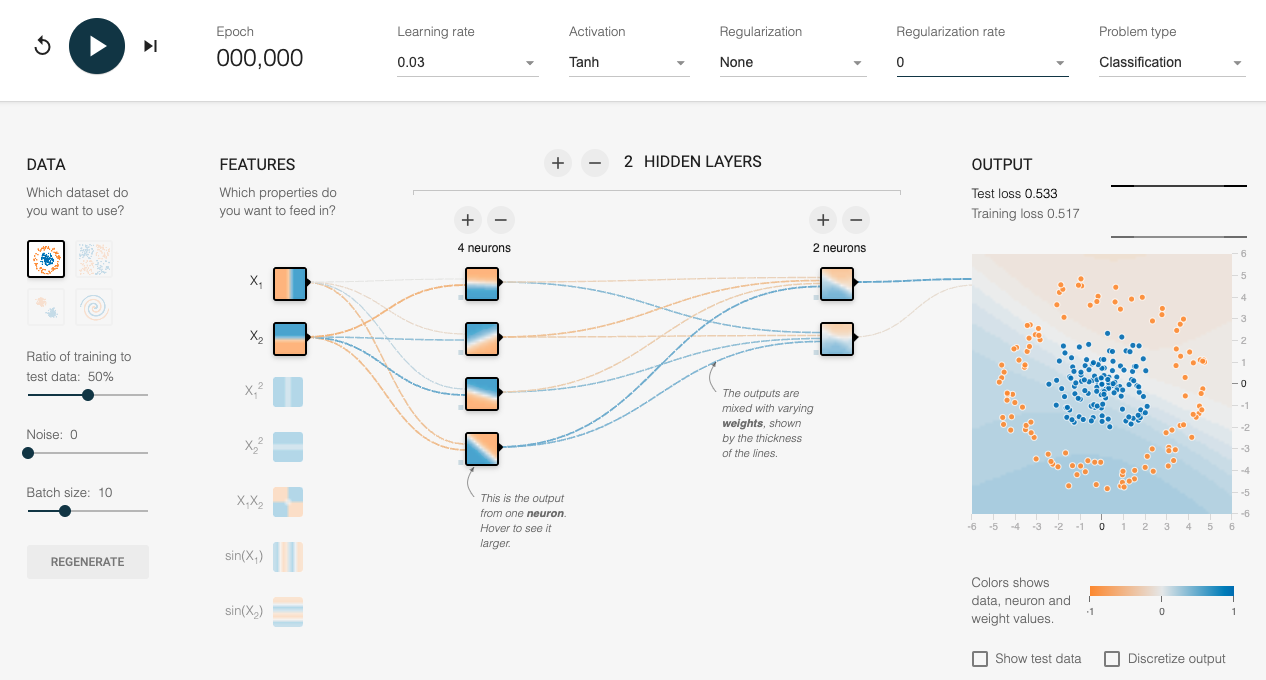

A visual example of what a similar classificiation neural network to the one we've just built looks like. Try create one of your own on the [Tensorflow Playground website](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.02491&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

### Setup loss function and optimizer

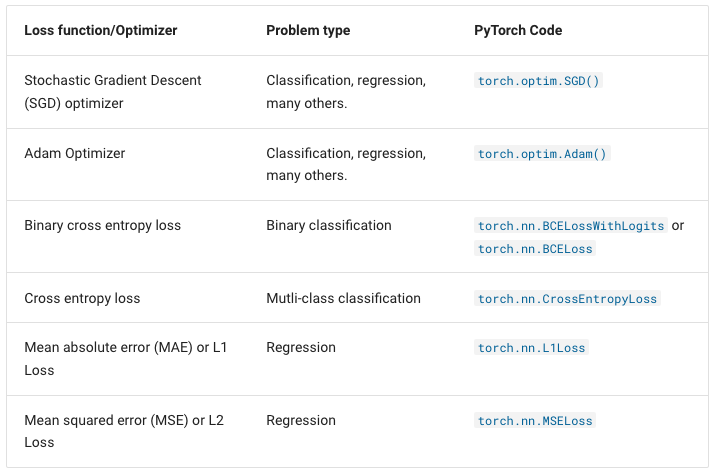

Pytorch has two binary cross entropy implementations:
1. [torch.nn.BCELoss()](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html): Creates a loss function that measures the binary cross entropy between the target (label) and input (features).
2. [torch.nn.BCEWithLogitsLoss()](https://pytorch.org/docs/stable/generated/torch.nn.BCEWithLogitsLoss.html): This is the same as above except it has a sigmoid layer ([nn.Sigmoid](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html)) built-in (we'll see what this means soon).

In [ ]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in

# Create an optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [ ]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    # eq() -> equal를 뜻함 -> eq(y_true, y_pred) -> [true, false, flase, true ..]
    # eq(y_true, y_pred).sum() -> 정답 수
    # eq(y_true, y_pred).sum().item() -> python 형변환 함수
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    # 정확도 = ( 정답 수 / 전체 수 ) * 100
    acc = (correct / len(y_pred)) * 100

    return acc

## 3.Fitting the model to data (training)
> We've got data and a model, now let's let the model (try to) find patterns in the (training) data.

### Pytorch training loop steps

1. Forward pass
> The model goes through all of the training data once, performing its `forward()` function calculations (`model(x_train)`).
2. Calculate the loss
> The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (`loss = loss_fn(y_pred, y_train`).
3. Zero gradients
> The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (`optimizer.zero_grad()`).
4. Perform backpropagation on the loss
> Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with `requires_grad=True`). This is known as backpropagation, hence "backwards" (`loss.backward()`).
5. Step the optimizer (gradient descent)
> Update the parameters with `requires_grad=True` with respect to the loss gradients in order to improve them (`optimizer.step()`).

### Going from raw model outputs to predicted labels
> logits -> prediction probabilities -> prediction labels

In [ ]:
# View the frist 5 outputs of the forward pass on the test data
y_logits = model_0(X_test.to(device))[:5]
# y_logits -> (batch, prediction)
print(y_logits.shape)
y_logits

torch.Size([5, 1])


tensor([[-0.2079],
        [-0.1507],
        [-0.3872],
        [-0.1570],
        [-0.4334]], grad_fn=<SliceBackward0>)

In [ ]:
# Use sigmoid as activate function
y_pred_probs = torch.sigmoid(y_logits)
# y_pred_probs -> (batch, prediction)
print(y_logits.shape)
y_pred_probs # (5, 1)

torch.Size([5, 1])


tensor([[0.4482],
        [0.4624],
        [0.4044],
        [0.4608],
        [0.3933]], grad_fn=<SigmoidBackward0>)

More specificially:
- If `y_pred_probs` >= 0.5, `y=1` (class 1)
- If `y_pred_probs` < 0.5, `y=0` (class 0)

To turn our prediction probabilties in prediction labels, we can round the outputs of the sigmoid activation function.

In [ ]:
# Find the predicted labels (round the prediction probabilities)
y_preds = torch.round(y_pred_probs)

# Get rid of extra dimension
y_preds.squeeze() #(5,)

tensor([0., 0., 0., 0., 0.], grad_fn=<SqueezeBackward0>)

Excellent! Now it looks like our model's predictions are in the same form as our truth labels (`y_test`).

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
torch.eq(y_preds.squeeze(), y_test[:5]) # 예측 값과 실제 값 비교

tensor([False,  True, False,  True, False])

In [ ]:
torch.eq(y_preds.squeeze(), y_test[:5]).sum()

tensor(2)

In [ ]:
torch.eq(y_preds.squeeze(), y_test[:5]).sum().item()

2

### Building a training and testing loop

In [ ]:
# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [ ]:
X_train.shape, y_train.shape

(torch.Size([800, 2]), torch.Size([800]))

In [ ]:
torch.manual_seed(42)

# Set the number of epochs
epochs = 1000

# Build training and evaluation loop
for epoch in range(epochs):
    #################################################
    ### Training loop -> 1 epoch 실행되었다.
    # 1. 순전파(forward) -> 모델 학습
    # 2. loss function -> 오차 계산
    # 3. 역전파(Backward) -> 오차만큼 model params 수정
    #################################################
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    # X_train -> (800, 2) -> (batch, features)
    # y_logits -> (batch, prediction) -> (800, 1)
    y_logits = model_0(X_train)
    # y_logits -> (batch(prediction),) -> (800,)
    y_logits = y_logits.squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    # y_pred -> (batch(probability),) -> (800,)
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train)
    # loss_fn(예측값, 실제값) -> 차이 계산
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                    y_train)
    # 정확도(accuracy_fn) = ( 정답 수 / 전체 수 ) * 100
    # accuracy_fn(실제값, 확률값) -> 정확도
    acc = accuracy_fn(y_true=y_train,
                        y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    #################################################
    ### Testing loop -> Training loop가 완료되었을 때, 실행
    # 1. torch.inference_mode() -> model params 고정(required_grad=False)
    # 2. 순전파(Forward) -> 예측 o / 학습 x
    # -> model_0(X_test) -> (batch, prediction)
    # -> model_0(X_test).squeeze() -> (batch(prediction),)
    # 3. loss function -> 오차 계산
    # -> y_test(batch(actual),)과 test_logits(batch(prediction),)에 대한 오차 계산
    # 4. 평가 -> 정확도(accuracy_fn)
    # -> 예측값을 확률값으로 변경 -> torch.sigmoid(test_logits)
    # -> 확률값을 이용해서 이진분류 -> torch.round(torch.sigmoid(test_logits))
    # -> 정확도 -> accuracy_fn(실제값, 예측된 이진분류)
    #################################################
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)

        test_pred = torch.round(torch.sigmoid(test_logits))
        test_acc = accuracy_fn(y_true=y_test,
                                y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69307, Accuracy: 51.25% | Test loss: 0.69596, Test acc: 46.00%
Epoch: 100 | Loss: 0.69299, Accuracy: 51.00% | Test loss: 0.69514, Test acc: 45.50%
Epoch: 200 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69488, Test acc: 45.50%
Epoch: 300 | Loss: 0.69298, Accuracy: 50.88% | Test loss: 0.69478, Test acc: 45.50%
Epoch: 400 | Loss: 0.69298, Accuracy: 51.25% | Test loss: 0.69474, Test acc: 45.50%
Epoch: 500 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69472, Test acc: 45.50%
Epoch: 600 | Loss: 0.69298, Accuracy: 51.38% | Test loss: 0.69470, Test acc: 45.50%
Epoch: 700 | Loss: 0.69298, Accuracy: 51.25% | Test loss: 0.69469, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69469, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Accuracy: 51.12% | Test loss: 0.69469, Test acc: 46.00%


The accuracy barely moves above 50% on each data split.
And because we're working with a balanced binary classification problem, it means our model is performing as good as random guessing (with 500 samples of class 0 and class 1 a model predicting class 1 every single time would achieve 50% accuracy).

## 4.Making predictions and evaluating a model (inference)
> Our model's found patterns in the data, let's compare its findings to the actual (testing) data.

In [ ]:
# !pip install torchvision

In [ ]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


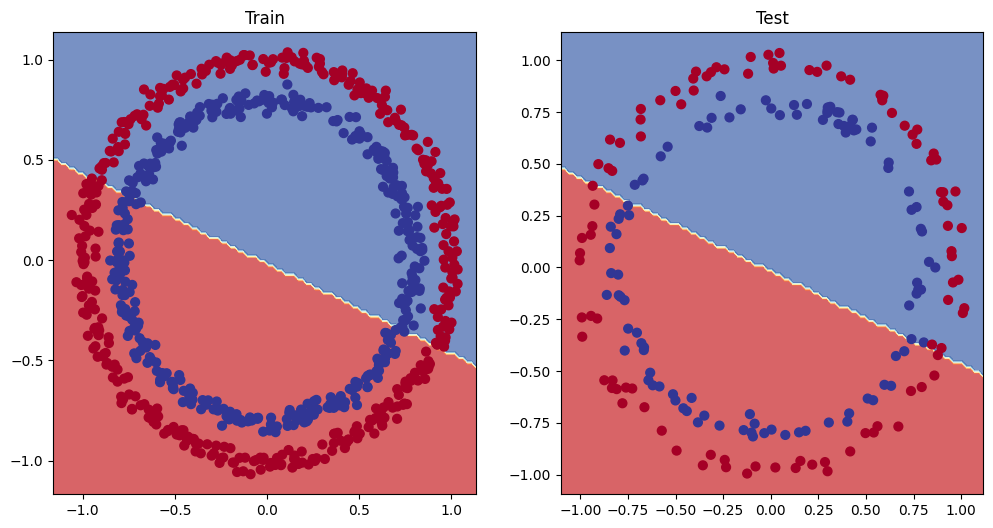

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

That explains the 50% accuracy. Since our data is circular, drawing a straight line can at best cut it down the middle.
In machine learning terms, our model is `underfitting`, meaning it's not learning predictive patterns from the data.

## 5.Improving a model (from a model perspective)
> We've trained an evaluated a model but it's not working, let's try a few things to improve it.

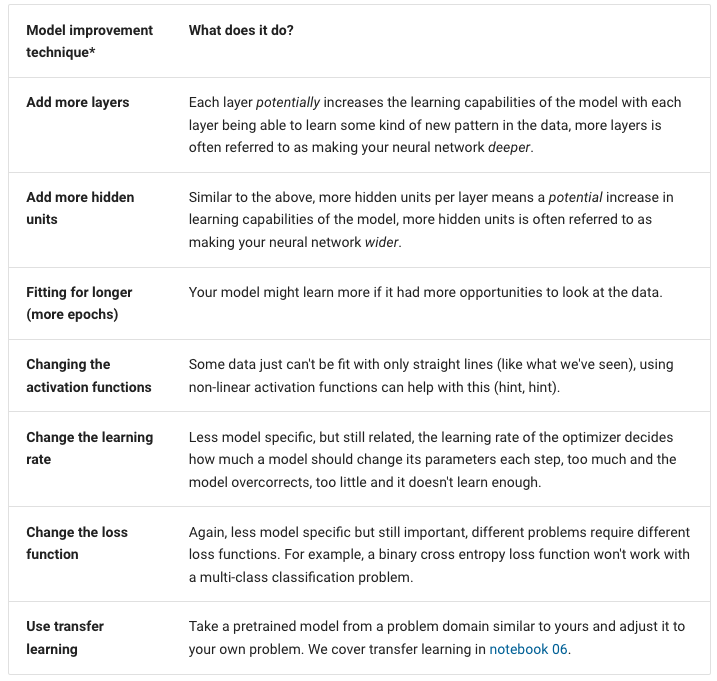

### Make a model_1 with extra layer

Add more layers

In [ ]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x): # note: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # layer1_out = self.layer_1(x)
        # layer2_out = self.layer_2(layer1_out)
        # prediction = self.layer_3(layer2_out)
        # return prediction
        return self.layer_3(self.layer_2(self.layer_1(x)))

In [ ]:
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# summary(모델인스턴스, (batch, features.shape))
# -> forward() 실행 결과 프린트
torchinfo.summary(model_1, (1, 2))

Layer (type:depth-idx)                   Output Shape              Param #
CircleModelV1                            [1, 1]                    --
├─Linear: 1-1                            [1, 10]                   30
├─Linear: 1-2                            [1, 10]                   110
├─Linear: 1-3                            [1, 1]                    11
Total params: 151
Trainable params: 151
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

In [ ]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input

In [ ]:
# optimizer를 통해서 모델 학습 진행
# lr(학습률) -> 학습률 조정을 통해 학습 스코어를 올리 수 있음
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [ ]:
list(model_1.parameters())

[Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188],
         [ 0.6146,  0.1323],
         [ 0.5224,  0.0958],
         [ 0.3410, -0.0998],
         [ 0.5451,  0.1045],
         [-0.3301,  0.1802]], requires_grad=True),
 Parameter containing:
 tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
          0.0667, -0.6984], requires_grad=True),
 Parameter containing:
 tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
           0.0346, -0.0997],
         [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
           0.1606, -0.1927],
         [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0055,
           0.2475, -0.2247],
         [ 0.0199, -0.2158,  0.0975, -0.1089,  0.0969, -0.0659,  0.2623, -0.1874,
          -0.1886, -0.1886],
         [ 0.2844,  0.1054,  0.3043, -0.2610,

### Fitting for longer (more epochs)

In [ ]:
torch.manual_seed(42)

epochs = 2000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> predicition probabilities -> prediction labels

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 200 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 200 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 400 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 600 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 800 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 1000 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 1200 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 1400 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 1600 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%
Epoch: 1800 | Loss: 0.69396, Accuracy: 50.88% | Test loss: 0.69261, Test acc: 51.00%


Our model trained for longer and with an extra layer but it still looks like it didn't learn any patterns better than random guessing.

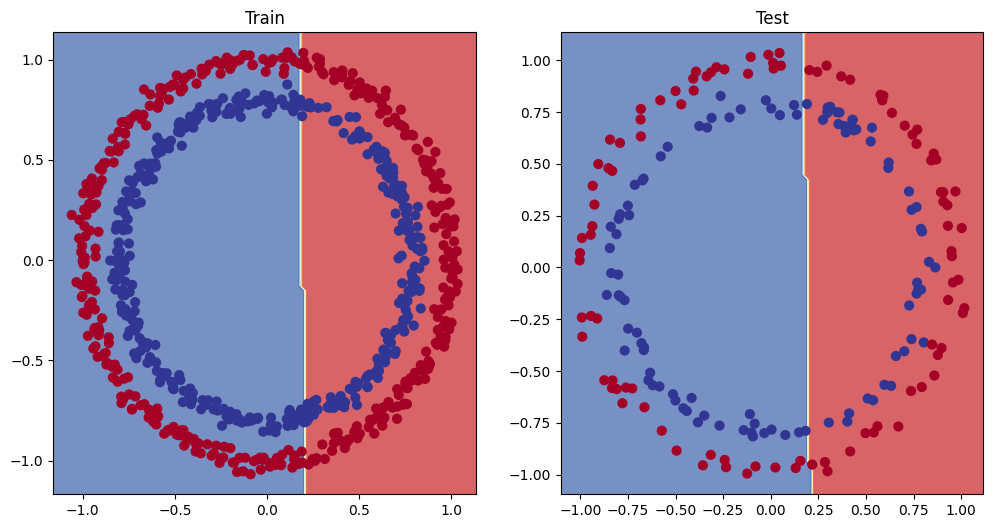

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)

### Preparing data to see if our model can model a straight line

In [ ]:
# Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data
X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias # linear regression formula

# Check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [ ]:
# Create train and test splits
train_split = int(0.8 * len(X_regression)) # 80% of data used for training set
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

# Check the lengths of each split
print(len(X_train_regression),
    len(y_train_regression),
    len(X_test_regression),
    len(y_test_regression))

80 80 20 20


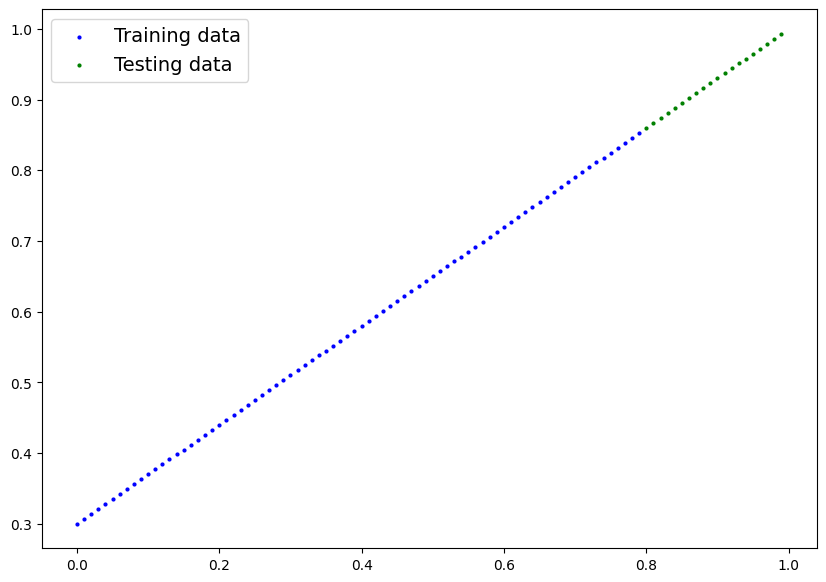

In [ ]:
plot_predictions(train_data=X_train_regression,
    train_labels=y_train_regression,
    test_data=X_test_regression,
    test_labels=y_test_regression
);

### Make a model_2
> Adjusting `model_1` to fit a straight line

In [ ]:
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Same architecture as model_1 (but using nn.Sequential)
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [ ]:
# Train the model
torch.manual_seed(42)

# Set the number of epochs
epochs = 2000

# Put data to target device
X_train_regression, y_train_regression = X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

for epoch in range(epochs):
    ### Training
    # 1. Forward pass
    y_pred = model_2(X_train_regression)

    # 2. Calculate loss (no accuracy since it's a regression problem, not classification)
    loss = loss_fn(y_pred, y_train_regression)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_2.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_pred = model_2(X_test_regression)
      # 2. Calculate the loss
      test_loss = loss_fn(test_pred, y_test_regression)

    # Print out what's happening
    if epoch % 200 == 0:
        print(f"Epoch: {epoch} | Train loss: {loss:.5f}, Test loss: {test_loss:.5f}")

Epoch: 0 | Train loss: 0.75986, Test loss: 0.54143
Epoch: 200 | Train loss: 0.07376, Test loss: 0.02850
Epoch: 400 | Train loss: 0.06107, Test loss: 0.02004
Epoch: 600 | Train loss: 0.04857, Test loss: 0.01326
Epoch: 800 | Train loss: 0.05600, Test loss: 0.01425
Epoch: 1000 | Train loss: 0.06455, Test loss: 0.02425
Epoch: 1200 | Train loss: 0.05297, Test loss: 0.00613
Epoch: 1400 | Train loss: 0.05555, Test loss: 0.01105
Epoch: 1600 | Train loss: 0.05861, Test loss: 0.00864
Epoch: 1800 | Train loss: 0.04373, Test loss: 0.01978


unlike `model_1` on the classification data, it looks `model_2`'s loss is actually going down.

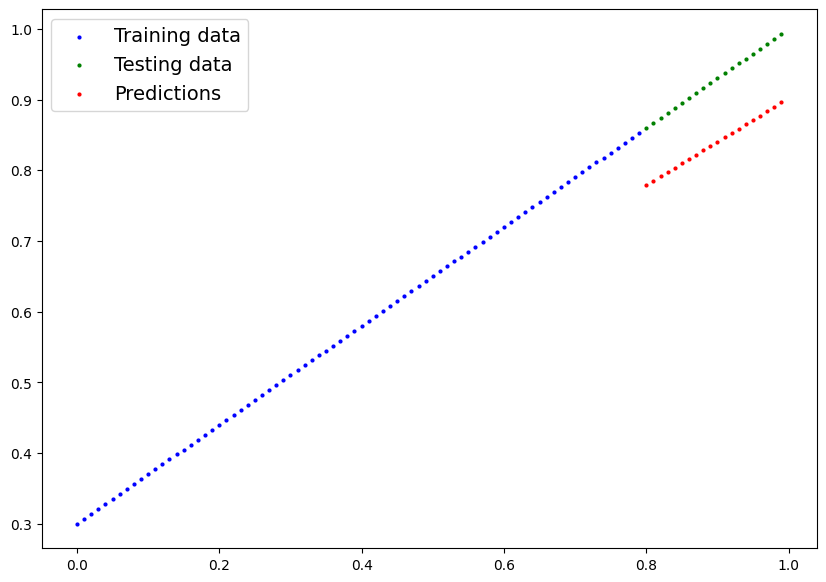

In [ ]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_regression)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

Alright, it looks like our model is able to do far better than random guessing on straight lines. This is a good thing.

## 6.Non-linearity
> So far our model has only had the ability to model straight lines, what about non-linear (non-straight) lines?

### Recreating non linear data (red and blue circles)

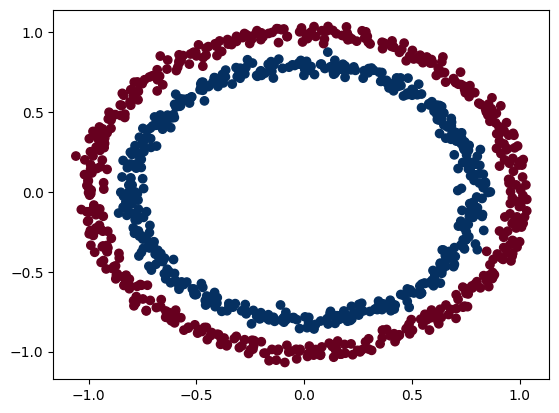

In [ ]:
# Make and plot data
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samples = 1000

X, y = make_circles(n_samples=1000,
    noise=0.03,
    random_state=42,
)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdBu);

In [ ]:
# Convert to tensors and split into train and test sets
import torch
from sklearn.model_selection import train_test_split

# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42
)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### Make a model_3 with non linearity

In [ ]:
# Build model with non-linear activation function
from torch import nn

class CircleModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function
        # Can also put sigmoid in the model
        # This would mean you don't need to use it on the predictions
        # self.sigmoid = nn.Sigmoid()

    def forward(self, x):
      # Intersperse the ReLU activation function between layers
      out = self.layer_1(x)
      out = self.relu(out)

      out = self.layer_2(out)
      out = self.relu(out)

      out = self.layer_3(out)
      return out
      # return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [ ]:
model_3 = CircleModelV2().to(device)
print(model_3)

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)


In [ ]:
torchinfo.summary(model_3,(1, 2))

Layer (type:depth-idx)                   Output Shape              Param #
CircleModelV2                            [1, 1]                    --
├─Linear: 1-1                            [1, 10]                   30
├─ReLU: 1-2                              [1, 10]                   --
├─Linear: 1-3                            [1, 10]                   110
├─ReLU: 1-4                              [1, 10]                   --
├─Linear: 1-5                            [1, 1]                    11
Total params: 151
Trainable params: 151
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

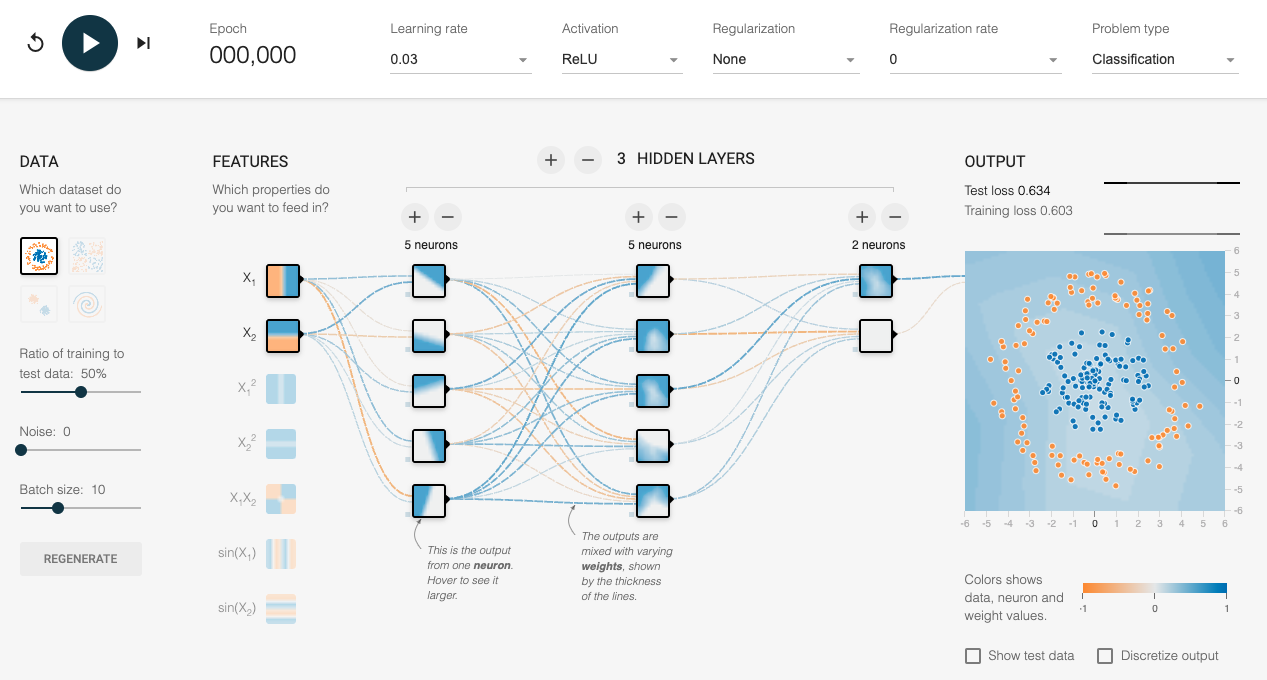

A visual example of what a similar classification neural network to the one we've just built (using ReLU activation) looks. Try create one of your own on the [TensorFlow Playground website](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=5,5,2&seed=0.53621&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [ ]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

### Training a model_3

In [ ]:
# Fit the model
torch.manual_seed(42)
epochs = 2000

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model_3(X_train).squeeze()

    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss calculates loss using logits

    # 2-1. accuracy
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> prediction probabilities -> prediction labels
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_3.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_3(X_test).squeeze()

      # 2. Calcuate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)

      # 2-1. accuracy
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test Loss: 0.69319, Test Accuracy: 50.00%
Epoch: 100 | Loss: 0.69115, Accuracy: 52.88% | Test Loss: 0.69102, Test Accuracy: 52.50%
Epoch: 200 | Loss: 0.68977, Accuracy: 53.37% | Test Loss: 0.68940, Test Accuracy: 55.00%
Epoch: 300 | Loss: 0.68795, Accuracy: 53.00% | Test Loss: 0.68723, Test Accuracy: 56.00%
Epoch: 400 | Loss: 0.68517, Accuracy: 52.75% | Test Loss: 0.68411, Test Accuracy: 56.50%
Epoch: 500 | Loss: 0.68102, Accuracy: 52.75% | Test Loss: 0.67941, Test Accuracy: 56.50%
Epoch: 600 | Loss: 0.67515, Accuracy: 54.50% | Test Loss: 0.67285, Test Accuracy: 56.00%
Epoch: 700 | Loss: 0.66659, Accuracy: 58.38% | Test Loss: 0.66322, Test Accuracy: 59.00%
Epoch: 800 | Loss: 0.65160, Accuracy: 64.00% | Test Loss: 0.64757, Test Accuracy: 67.50%
Epoch: 900 | Loss: 0.62362, Accuracy: 74.00% | Test Loss: 0.62145, Test Accuracy: 79.00%
Epoch: 1000 | Loss: 0.56818, Accuracy: 87.75% | Test Loss: 0.57378, Test Accuracy: 86.50%
Epoch: 1100 | Loss: 0.

That's looking far better!!!!

### Evaluating a model_3 trained

In [ ]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([1., 1., 1., 1., 0., 1., 1., 1., 1., 0.]))

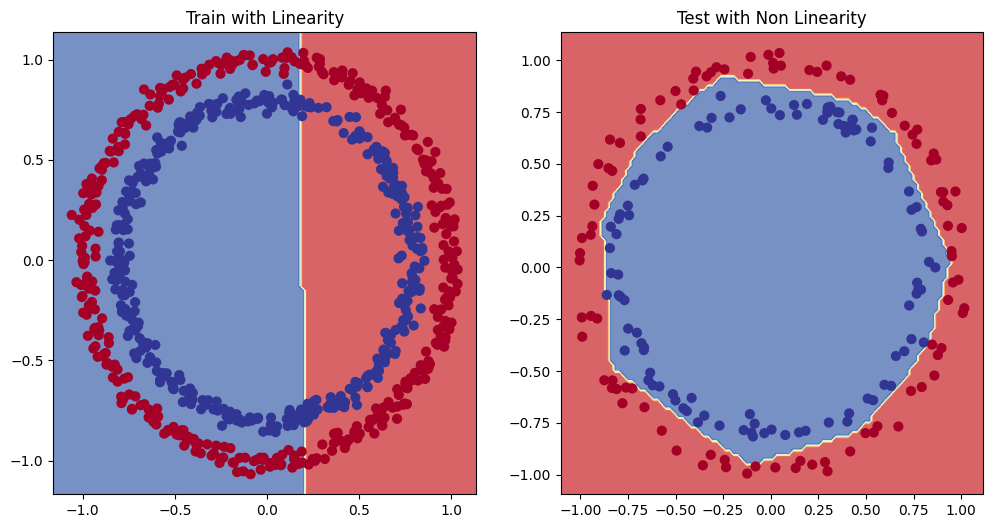

In [ ]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train with Linearity")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test with Non Linearity")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity